<h4>Author- Manit Maini</h4>

<h2>Task #1: Prediction Using Supervised Machine Learning</h2>
<h4>GRIP@ THE SPARKS FOUNDATION</h4>

<h3>Linear Regression with Python Scikit Learn</h3>
<h6>In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.</h6>

<h3>Simple Linear Regression</h3>
<h6>In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.</h6>

<h2>Importing Libraries</h2>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

<h2>Loading and visualizing Data</h2>

In [3]:
raw_data=pd.read_csv("student_scores - student_scores.csv")

In [4]:
data=raw_data.copy()

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.shape

(25, 2)

<h2>Exploratory data analysis</h2>

In [7]:
data.describe(include="all")

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [9]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


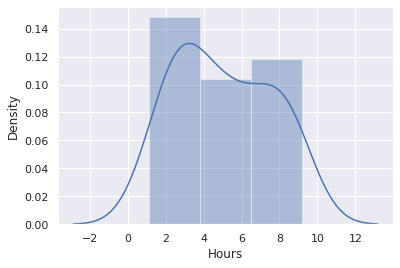

In [10]:
sns.distplot(data['Hours'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


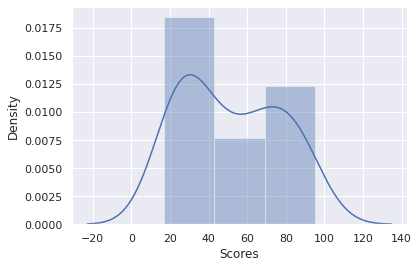

In [11]:
sns.distplot(data['Scores'])

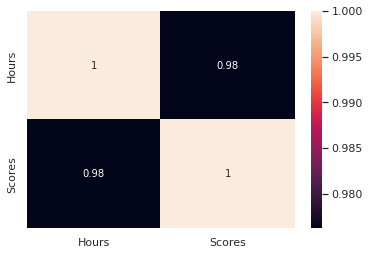

In [12]:
#checking correlation
sns.heatmap(data.corr(),annot=True)

In [13]:
from scipy import stats
r,p=stats.pearsonr(data.Scores,data.Hours)
print("p value of correlation is {} and r value is {}".format(p,r))

p value of correlation is 9.132624467460325e-17 and r value is 0.9761906560220884


In [14]:
#checking for missing values in each feature
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

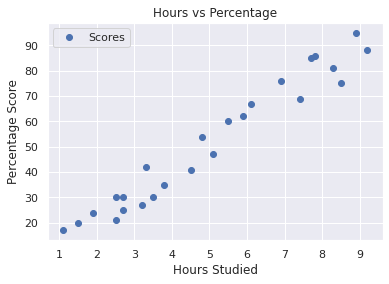

In [15]:
#plottting data
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

<h2>preparing the data</h2>

In [16]:
# storing the target in Y and features in X
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [17]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=42) 

<h2>Training Model</h2>

In [18]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [19]:
#slope
model.coef_[0]

9.682078154455697

In [20]:
#y-intercept
model.intercept_

2.826892353899737

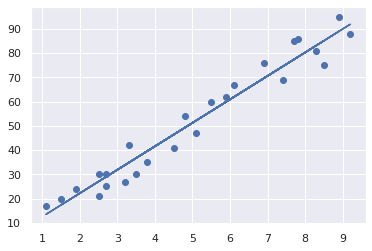

In [21]:
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

<h2>Testing the model</h2>

In [22]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [23]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [24]:
#Testing with our own data
hours = 9.25
own_pred = model.predict(np.array([[hours]]))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


<H2>Evaluating Model performance</h2>

In [25]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.9207511902099244


In [26]:
model.score(X_train,y_train)

0.9491209376364416

In [27]:
model.score(X_test,y_test)

0.9678055545167994

<h2>Conclusion</h2>

There is very strong linear relationship between Hour and Score feature as correeation is 0.98 and p-value of relationship explained by this varible is very low, implying that probability of having such strong linear relationship with random datasets is very low, so this linear relationship is not mere coincidence, so the best suited model for this dataset as linear regression.